# Numerical Differentiation

As far as finding a derivative analytically is purely technical task, it is also useful tp be able to establish some numerical approximations of the derivative (to analyze the trend or the rate pf change of some real-life time series, e.g. currency exchange rate, etc.).

Baring that in mind one usually can solve two separate tasks: 
+ finding the derivative of a smooth function (assuming that the smoothness is given)
+ finding the derivative of distorted function (e.g. a signal with some random noise)

We propose you to try yourself in both tasks following our instructions.

## Derivative of smooth functions: Finite Differences

Assume that we have some nice smooth function $f(x)$ on a segment $I$. 

The simplest attempt to find the derivative stems from the definition of the derivative:
$$    
\lim\limits_{h \to 0} \frac{f(a+h)-f(a)}{h}=f'(a) 
$$

Thus we can come up with an idea of the approximation:
$$    
f'(a)\approx \frac{f(a+h)-f(a)}{h}
$$
This formula is called **forward differences**.

### Task 1. Forward differences implementation

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

You need to write a function with the following signature:
```
def derForward(f, I, h) 
```
This function should get as input function $f$ and segment $I$ as Python list of two elements --- ends of the segment. 

In the function you are asked to divide the segment $I$ into small segments of length $h$, thus getting a grid $x$. Your function should return `dy` --- forward differences for each point `x` (except the border since the formula asks for the next value). You should return both `x` and `dy` arrays of the same length.

In [3]:
def derForward(f, I, h):
    # your code goes here
    x = np.arange(I[0], I[1], h)
    dy = np.full(len(x), 0.0)
    for i in range(len(x)):
        dy[i] = (f(x[i] + h) - f(x[i])) / h
    
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checkerpub
checkerpub.findif_check(derForward)

Test 1 |::|  err= 0.0049999766599   |::|  time:  0.0005307197570800781 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 1.71567590839   |::|  time:  0.0001354217529296875 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 0.00999927002953   |::|  time:  0.00016617774963378906 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


### Task 2. Backward differences

Similarly to forward differences, one can formulate **backward differences**:
$$
f'(a)\approx \frac{f(a)-f(a-h)}{h}
$$

Modify your function to get backward differences. **Note: your `x` should be different since now you ask for previous point!**

In [5]:
def derBackward(f, I, h):
    # your code goes here
    x = np.arange(I[0], I[1], h)
    dy = np.full(len(x), 0.0)
    for i in range(len(x)):
        dy[i] = (f(x[i]) - f(x[i] - h)) / h
    x = x[1:]
    dy = dy[1:]
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [6]:
checkerpub.findif_check(derBackward)

Test 1 |::|  err= 0.0049999616243   |::|  time:  0.0005514621734619141 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 0.811421072236   |::|  time:  0.0001583099365234375 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 0.00999807013152   |::|  time:  0.000164031982421875 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


### Task 3. Symmetrical Differences

Essentially, one could try to bring forward/backward asymmetry together. This method is called **symmetrical differences**:
$$
f'(a) \approx \frac{f(a+h)-f(a-h)}{2h}
$$
Despite the fact we lose two poins now, let us also implement this method (we compare them below):

In [7]:
def derSymmetrical(f, I, h):
    # your code goes here
    x = np.arange(I[0], I[1], h)
    dy = np.full(len(x), 0.0)
    for i in range(len(x)):
        dy[i] = (f(x[i] + h) - f(x[i] - h)) / (2*h)
    x = x[1:]
    dy = dy[1:]
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [8]:
checkerpub.findif_check(derSymmetrical)

Test 1 |::|  err= 1.6666580428e-05   |::|  time:  0.0006945133209228516 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 0.212024826855   |::|  time:  0.0001690387725830078 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 6.50533567974e-05   |::|  time:  0.00019025802612304688 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


**Have you noticed that errors changed?** Let us illustrate it.

## Task 4. Compare by eyes

Assume we want to experiment with $f(x)=\sin(x)$. Let $I=[0, 2\pi]$ and $h=1/10$. Compute:
+ forward differences
+ backward differences
+ symmetrical differences

If we plot all results with the right answer ($f'(x)=\cos(x)$), we should get picture like this:

![target](tmp.png)

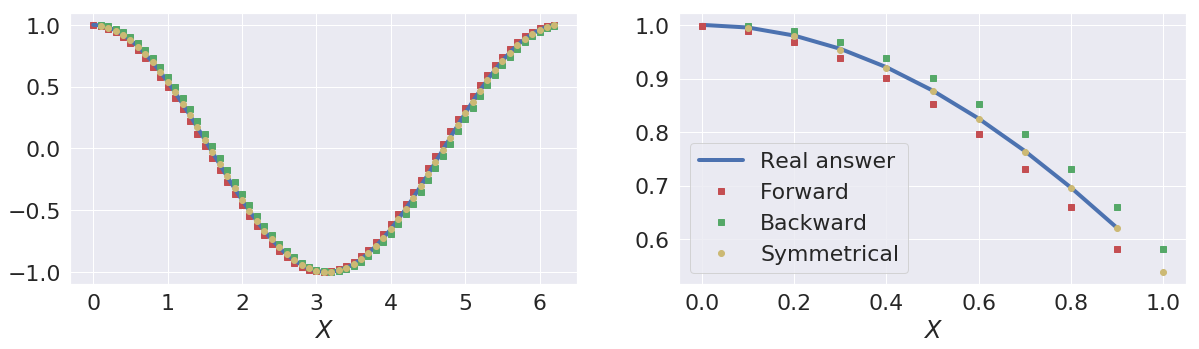

In [9]:
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
plt.xlabel('$X$')

f = sin
I = [0, 2 * np.pi]
h = 0.1

x, y_0 = derForward(f, I, h)
plt.plot(x, y_0, 'rs')
plt.plot(x, np.cos(x), 'b-')

x, y_1 = derBackward(f, I, h)
plt.plot(x, y_1, 'gs')

x, y_2 = derSymmetrical(f, I, h)
plt.plot(x, y_2, 'yo')

plt.subplot(1, 2, 2)
plt.xlabel('$X$')

x, y_0 = derForward(f, I, h)
plt.plot(x[:10], np.cos(x)[:10], 'b-', label='Real answer')
plt.plot(x[:10], y_0[:10], 'rs', label='Forward')

x, y_1 = derBackward(f, I, h)
plt.plot(x[:10], y_1[:10], 'gs', label='Backward')

x, y_2 = derSymmetrical(f, I, h)
plt.plot(x[:10], y_2[:10], 'yo', label='Symmetrical')

plt.legend()
plt.show()

**As we have seen by tests above, symmetrical differences are the most accurate.** You can also experiment with $f(x)=x^x$ below:

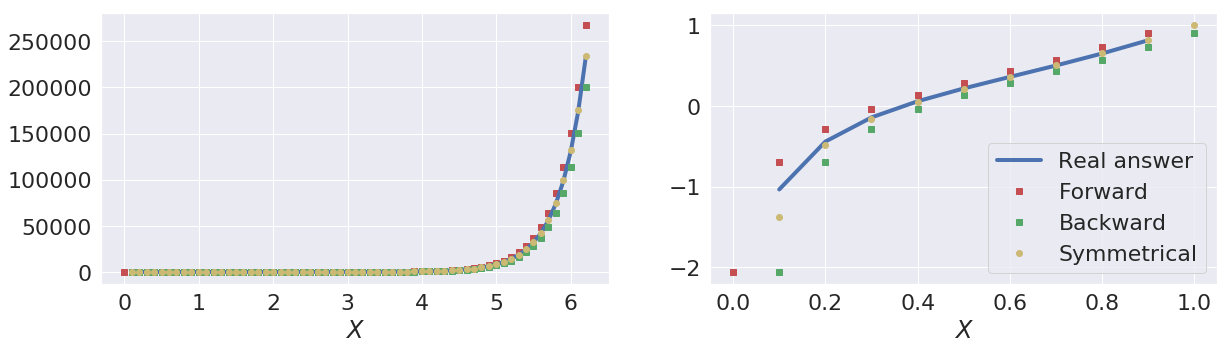

In [10]:
# optional experiment
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
plt.xlabel('$X$')

f = lambda x: x**x
df = lambda x: x**x * (np.log(x) + 1)
I = [0, 2 * np.pi]
h = 0.1

x, y_0 = derForward(f, I, h)
plt.plot(x, y_0, 'rs')
plt.plot(x, df(x), 'b-')

x, y_1 = derBackward(f, I, h)
plt.plot(x, y_1, 'gs')

x, y_2 = derSymmetrical(f, I, h)
plt.plot(x, y_2, 'yo')

plt.subplot(1, 2, 2)
plt.xlabel('$X$')

x, y_0 = derForward(f, I, h)
plt.plot(x[:10], df(x)[:10], 'b-', label='Real answer')
plt.plot(x[:10], y_0[:10], 'rs', label='Forward')

x, y_1 = derBackward(f, I, h)
plt.plot(x[:10], y_1[:10], 'gs', label='Backward')

x, y_2 = derSymmetrical(f, I, h)
plt.plot(x[:10], y_2[:10], 'yo', label='Symmetrical')

plt.legend()
plt.show()

## Task 5. Error estimation

Using **Taylor expansion**, one can show the following estimations:

1) $ \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

2) $ \left| \frac{f(a)-f(a-h)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

3) $ \left| \frac{f(a+h)-f(a-h)}{2h} -f'(a) \right| \le \frac{h^2}{6}M  $
where $M=\max_{x\in[a;a+h]} f'''(x)$;

This is a point-wise estimations, so we will use the maximal of then on the whole segment:
$$
\left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \to \max_{a\in I} \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right|=Err(h)
$$

For different values of $h$ estimate errors for **forward** and **symmetrical** differences (use $f(x)=\sin(x)$):

In [11]:
hs = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])
errs_forward = []
errs_symmetrical = []
errs_forward_theo = []
errs_symmetrical_theo = []

f = sin
I = [0, 2 * np.pi]
h = 0.1

for h in hs:
    x, y = derForward(f, I, h)
    err = max(abs(y - np.cos(x)))
    errs_forward.append(err)
    errs_forward_theo.append(h / 2 * max(-np.sin(x)))
    
    x, y = derSymmetrical(f, I, h)
    err = max(abs(y - np.cos(x)))
    errs_symmetrical.append(err)
    errs_symmetrical_theo.append(h**2 / 6 * max(-np.cos(x)))

Since we want to show that:
$$
Err(h) \sim h^\gamma
$$
it is essential to use `loglog` scale: if you take logarithm from both sides, you get:
$$ \ln Err(h) \sim \gamma \ln h $$
a straight line. Acquiring $\gamma$ is negative, it is better to plot it against not $h$, but $1/h$ or $|I|/h$.

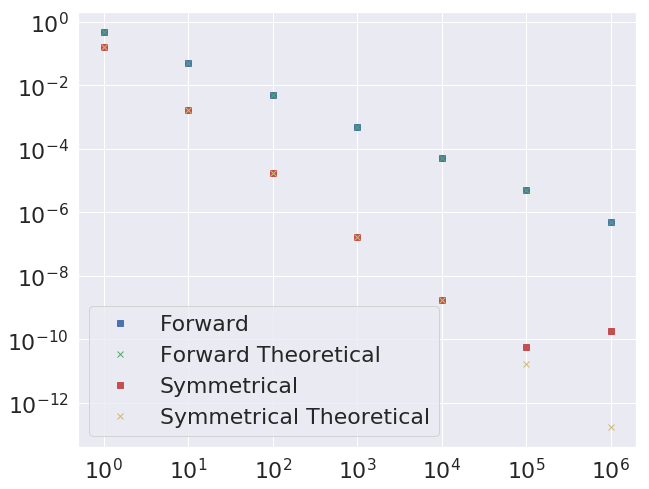

In [12]:
plt.figure(figsize=(10, 8))

#your code goes here

plt.loglog(1 / hs, errs_forward, 'bs', label='Forward')
plt.loglog(1 / hs, errs_forward_theo, 'gx', label='Forward Theoretical')
plt.loglog(1 / hs, errs_symmetrical, 'rs', label='Symmetrical')
plt.loglog(1 / hs, errs_symmetrical_theo, 'yx', label='Symmetrical Theoretical')

plt.legend()
plt.show()

## Task 6. Derivative of Noised function

Assume that we got somehow noised $\sin(x)$ function from real-life source, e.g.:

In [13]:
x, data=checkerpub.getNoised(n=1000, alpha=0.1, sigma=0.1)

Here:
+ `n` is a number of points on the $[0, 10]$ segment;
+ `alpha` is a parameter of autoregression; in a way, it refers to the memory of the noise -- how long it "remembers" distorted values; if this parameter is close to $1$, function will sufficiently diverge from the initial $\sin(x)$;
+ `sigma` is the dispersion of the noise.

Let us plot it

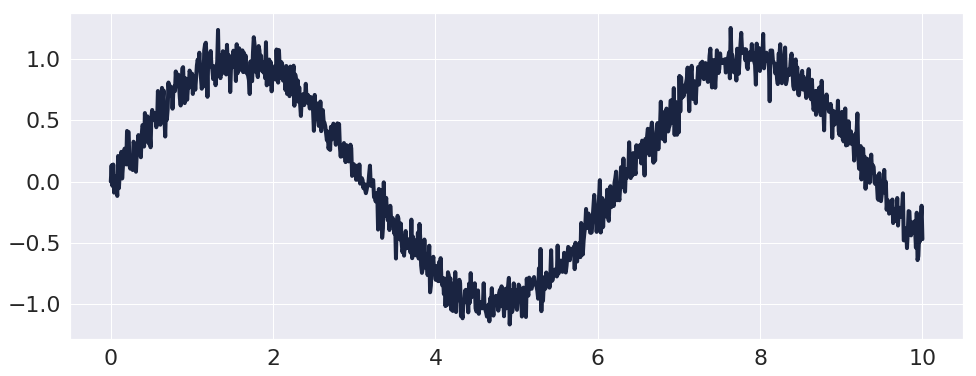

In [14]:
plt.figure(figsize=(16,6))
plt.plot(x, data)

You can try to apply finite differences to this function. The result will be catastrophically large due to the noise: our function stopped being smooth. Hence, we need more stable mechanism of finding a derivative.

The idea is the following:

1. By the definition of differentiability, differentiable function can be approximated by piecewise-linear;

2. Assume we have this approximation. If we consider some heighbourhood of the given point $a$, then the approximation is not _piecewise linear_ --- it is just linear! And it is easy to differentiate linear function.

Formally one should do the following: 

+ we characterize the neightbourhood by half-window length `hw`, thus for the `i`-point in array we are considering `[i-hw:i+hw]` window

+ in such a window one should find the closest approximating line and determine its coefficient; it's an approximation of the derivative

**Note**: you do not need the knowledge of the formula of the coefficient: since we stated here `Linear Regression` problem, you can use already written one

**Note**: you can always choose not to use it, so we write the formula here:
$$
\kappa=\frac{n \sum_{i=1}^n (x_iy_i)-\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{n\sum_{i=1}^n x^2_i-\left( \sum_{i=1}^n x_i \right)^2}
$$


In [15]:
def derWindow(x, y, hw):
    coefs = []
    for i in range(hw, x.size - hw):
        coef = checkerpub.coef(x[i - hw : i + hw], y[i - hw : i + hw])
        coefs.append(coef)
        
    x = x[hw : -hw]
    df = np.array(coefs)

    return x, df 

Let us try to check ourselves. If we choose smooth enough function (e.g. $\sin x$) then our sliding derivative technique should be close to real derivative (with reasonable `hw`). Check your function for different `hw`; you may also change $\sin x$.

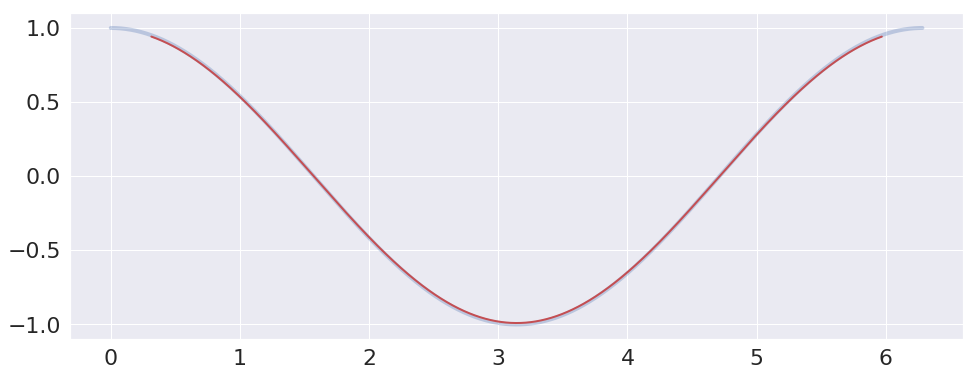

In [16]:
x_test = np.linspace(0, 2*np.pi, 10000)
hw = 500

y_test = np.sin(x_test)

der_true = np.cos(x_test)

x_new, der_new = derWindow(x_test, y_test, hw)

plt.figure(figsize=(16,6))
plt.plot(x_test, der_true, 'b-', linewidth=4, alpha=0.3)
plt.plot(x_new, der_new, 'r-', linewidth=2)
plt.show()

### Task 7. Plot results

Let us also plot results for three different half-window sizes: 50, 10 and 200.
    
**PLease, try to use different colors and styles to make a nice picture!** You should get something close to:

![](tmp2.png)

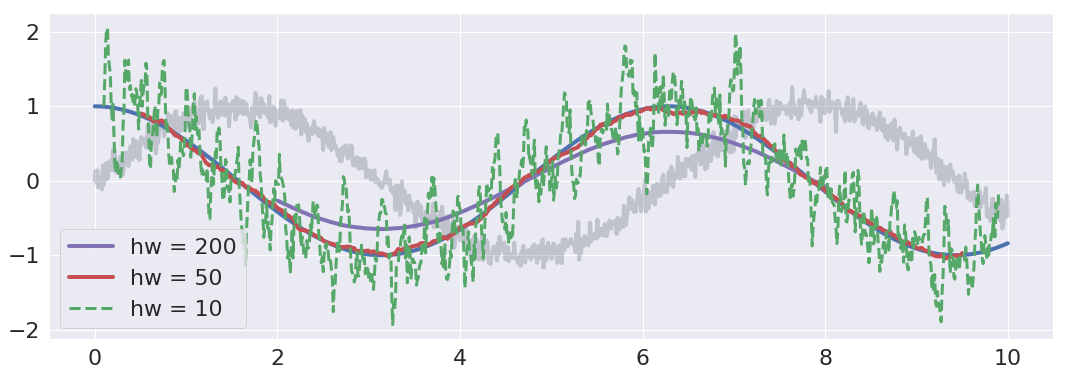

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(x, data, alpha=0.2)
plt.plot(x, np.cos(x), 'b')

hw = 200
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'm-', label='hw = 200')

hw = 50
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'r-', label='hw = 50')

hw = 10
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'g--', linewidth=3, label='hw = 10')

plt.legend()
plt.show()

It is also interesting to play with different `alpha` and `sigma`. You are welcome to do it here:

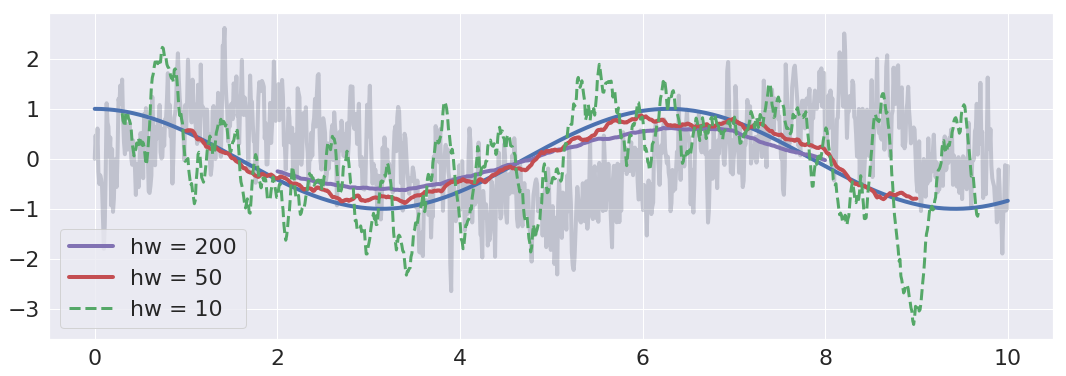

In [18]:
# optional experiment
x, data=checkerpub.getNoised(n=1000, alpha=0.5, sigma=0.5)

plt.figure(figsize=(18, 6))
plt.plot(x, data, alpha=0.2)
plt.plot(x, np.cos(x), 'b')

hw = 200
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'm-', label='hw = 200')

hw = 100
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'r-', label='hw = 50')

hw = 30
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'g--', linewidth=3, label='hw = 10')

plt.legend()
plt.show()


## Task 8. Results

Please, answer the following questions:

1. Does theoretical estimations of the error coincide with your experiments? If there is a divergence from a straight line, how can it be explained?

2. What can you say about optimal window length in the last part of the experiment? Is there any monotonic behaviour?

1. Forward theoretical estimation of error coincides with what we've got in our experiment. Howevever, we can see that there is a deviation from the line of Symmetrical theoretical estimation. In theory for h -> 0 the error should also approach zero but in practice we also have a rounding error, which might yield the dieviation we saw for Symmetrical difference.

2. With the small window length our approximation looks too noisy and diverges too much from the real derivative. However, there is a monotonic behaviour as when we increase window length our approximation gets more and more smooth. The optimal window length was lying somewhere in the middle in our first example (hw = 50 to be exact) as visually it was the closet one, but this obviously depends on alpha and sigma choice, which we could see from the optional experiment.